In [113]:
import pandas as pd
import numpy as np

In [114]:
# pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
# pd.set_option('display.width', 1000)
# pd.set_option('display.expand_frame_repr', True)

In [115]:
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import datetime
import warnings
warnings.filterwarnings('ignore')

In [116]:
from matplotlib import rcParams
#colorbrewer2 Dark2 qualitative color table
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

rcParams['figure.figsize'] = (10, 4)
rcParams['figure.dpi'] = 150
#rcParams['axes.color_cycle'] = dark2_colors
rcParams['lines.linewidth'] = 2
rcParams['font.size'] = 8
rcParams['patch.edgecolor'] = 'white'
rcParams['patch.facecolor'] = dark2_colors[0]
rcParams['font.family'] = 'StixGeneral'
rcParams['axes.grid'] = True
rcParams['axes.facecolor'] = '#eeeeee'

In [117]:
age_group=pd.read_csv('AgeGroupDetails.csv')
covid=pd.read_csv('covid_19_india.csv')
hospitalbeds=pd.read_csv('HospitalBedsIndia.csv')
testing=pd.read_csv('ICMRTestingDetails.csv')
individual=pd.read_csv('IndividualDetails.csv')
population=pd.read_csv('population_india_census2011.csv')
#population_new=pd.read_csv('population_india_census2011_new.csv')

In [119]:
covid['Date'] =  covid['Date'].apply(lambda x:pd.to_datetime(x, format='%d-%m-%Y'))

In [120]:
covid

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
...,...,...,...,...,...,...,...,...,...
1473,1474,2020-04-30,5:00 PM,Telengana,-,-,367,26,1012
1474,1475,2020-04-30,5:00 PM,Tripura,-,-,2,0,2
1475,1476,2020-04-30,5:00 PM,Uttarakhand,-,-,36,0,55
1476,1477,2020-04-30,5:00 PM,Uttar Pradesh,-,-,513,39,2203


In [121]:
covid_confirmed=covid.drop(['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational','Cured','Deaths'],axis=1)

In [122]:
covid_confirmed

,Date,State/UnionTerritory,Confirmed
0,2020-01-30,Kerala,1
1,2020-01-31,Kerala,1
2,2020-02-01,Kerala,2
3,2020-02-02,Kerala,3
4,2020-02-03,Kerala,3
...,...,...,...
1473,2020-04-30,Telengana,1012
1474,2020-04-30,Tripura,2
1475,2020-04-30,Uttarakhand,55
1476,2020-04-30,Uttar Pradesh,2203


In [123]:
q9=(covid_confirmed.groupby('Date', as_index=False).sum())

In [124]:
q9.reset_index(drop=False,inplace=True)

In [125]:
before_lockdown = q9.iloc[0:55]

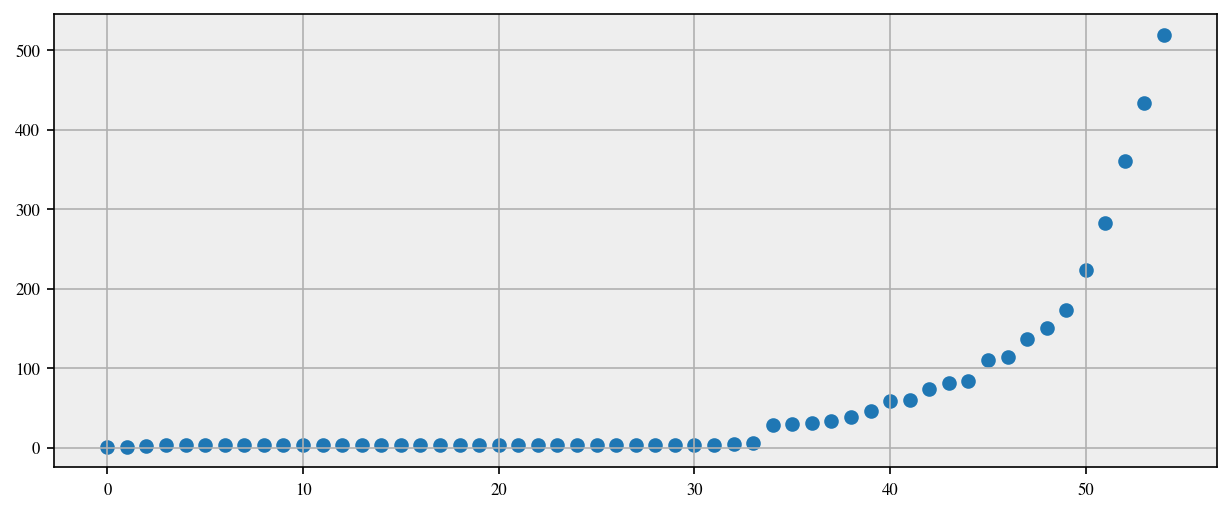

In [126]:
plt.scatter(before_lockdown['index'], before_lockdown['Confirmed'])

## Polynomial Regression

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [128]:
polynomial_features= PolynomialFeatures(degree=7)

In [129]:
x=before_lockdown['index']
x = x[:, np.newaxis]
y=before_lockdown['Confirmed']
y = y[:, np.newaxis]
x2=q9['index']
x2= x2[:, np.newaxis]
y2=q9['Confirmed']
y2 = y2[:, np.newaxis]

In [130]:
x_poly = polynomial_features.fit_transform(x)
x2_poly = polynomial_features.fit_transform(x2)

In [131]:
model = LinearRegression()
model.fit(x_poly, y)

y_poly_pred = model.predict(x_poly)

y2_poly_pred = model.predict(x2_poly)

In [132]:
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

4.838431907688922
0.9980608214841724


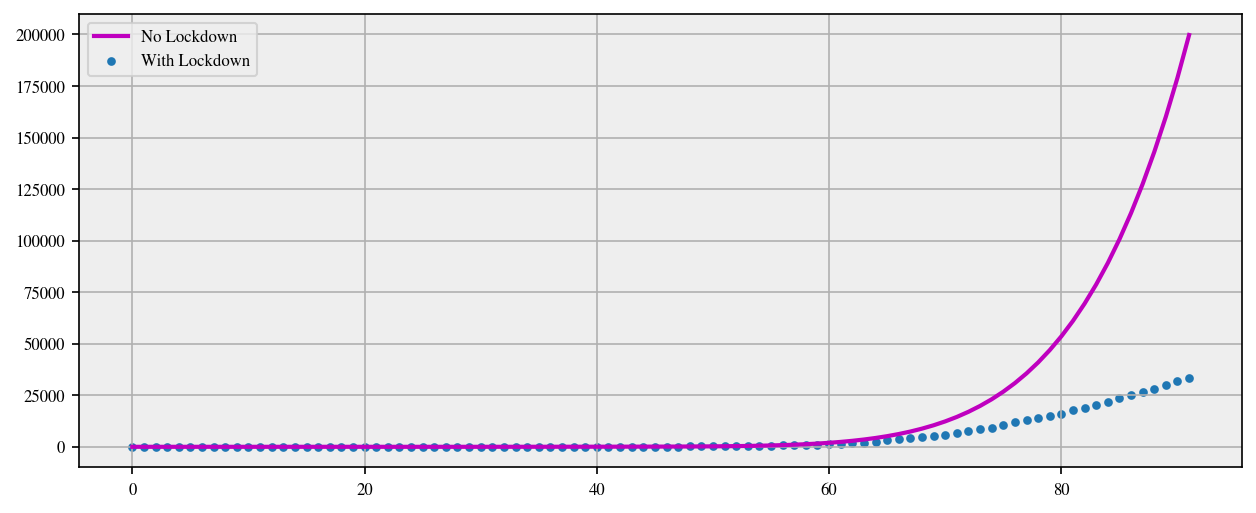

In [133]:
plt.scatter(x2, y2, s=10,label='With Lockdown')
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x2,y2_poly_pred), key=sort_axis)
x2, y_poly_pred = zip(*sorted_zip)
plt.plot(x2, y2_poly_pred, color='m',label='No Lockdown')
plt.legend()
plt.show()

### Hence without the lockdown there would be about 200,000 cases as opposed to 33,000 cases

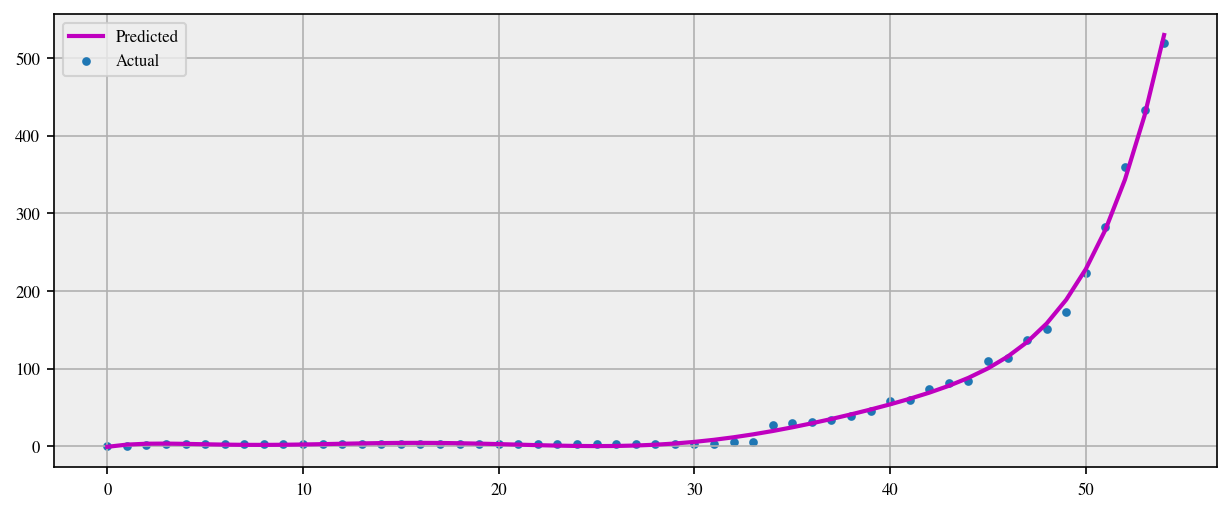

In [152]:
plt.scatter(x, y, s=10,label='Actual')
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m',label="Predicted")
plt.legend()
plt.show()

## Finding the Degree of the Polynomial Expression

In [135]:
#When degree=5
#rmse=10.59538002587887
#r2=0.9907008853891075

#When degree=6
#rmse=6.294386858922696
#r2=0.9967181752417156

#When degree=7
#rmse=4.838431907688922
#r2=0.9980608214841724

#when degree=8
#rmse=4.812393869843869
#r2=0.9980816367160587

In [136]:
data = {'RMSE':[10.59538002587887, 6.294386858922696, 4.838431907688922, 4.812393869843869], 'Degree':[5,6,7,8]}

In [137]:
df = pd.DataFrame(data)

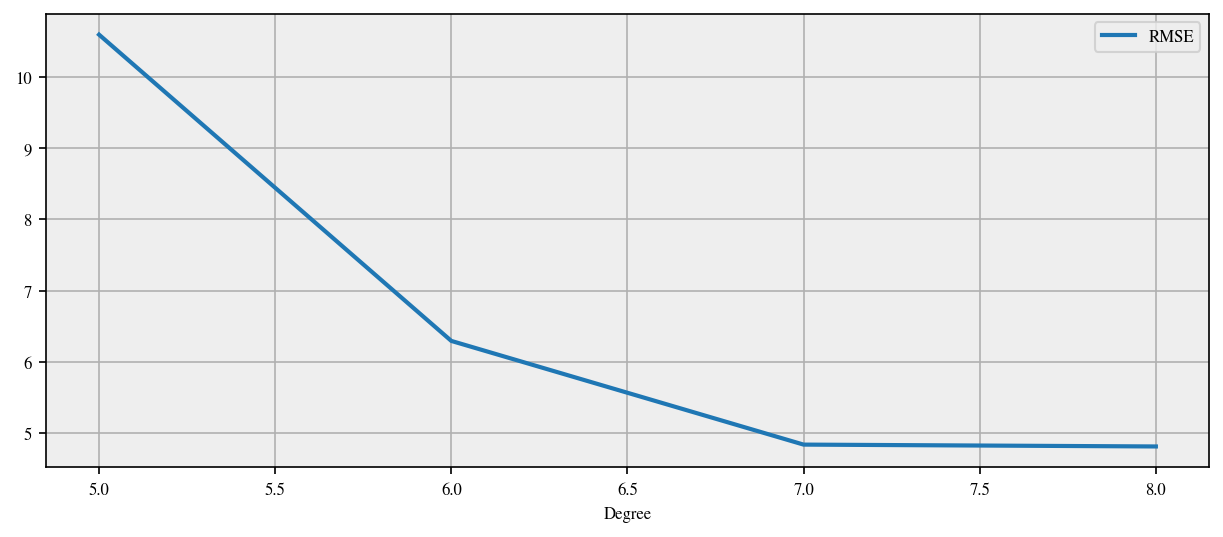

In [138]:
df.plot('Degree','RMSE')

Since there is no substantial change in RMSE post degree 7 we choose degree as 7 to minimize overfitting

## Exponential Relationship

In [139]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [140]:
x=before_lockdown['index']
x = x[:, np.newaxis]

x2=q9['index']
x2= x2[:, np.newaxis]

log_y=np.log(before_lockdown['Confirmed'])
log_y = log_y[:, np.newaxis]

log_y2=np.log(q9['Confirmed'])
log_y2 = log_y2[:, np.newaxis]

y=before_lockdown['Confirmed']
y = y[:, np.newaxis]

y2=q9['Confirmed']
y2 = y2[:, np.newaxis]

In [141]:
model = LinearRegression()
model.fit(x, log_y)

#Data till 24/03/2020
log_y_predict = model.predict(x)
y_exp_pred=np.exp(log_y_predict)

#Data till 30/04/2020

log_y2_pred = model.predict(x2)
y2_exp_pred=np.exp(log_y2_pred)

In [142]:
rmse = np.sqrt(mean_squared_error(y,y_exp_pred))
r2 = r2_score(y,y_exp_pred)
print(rmse)
print(r2)

71.75430801258224
0.5735142891200873


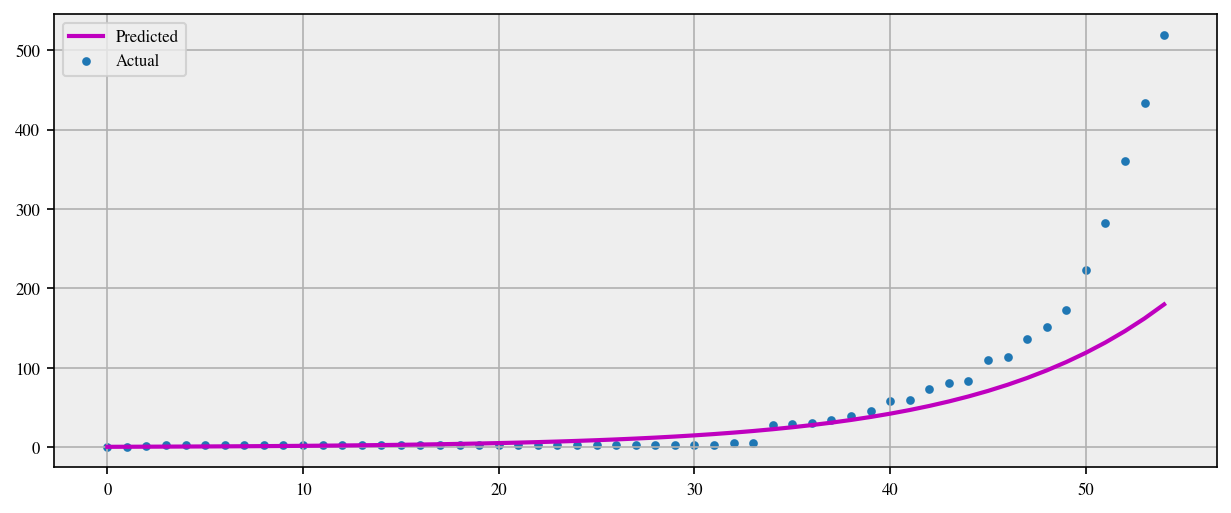

In [154]:
plt.scatter(x, before_lockdown['Confirmed'], s=10,label='Actual')
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_exp_pred), key=sort_axis)
x, y_exp_pred = zip(*sorted_zip)
plt.plot(x, y_exp_pred, color='m',label='Predicted')
plt.legend()
plt.show()

As we can see the exponential relationship does not suitably match the relationship in which the data is increasing

The RMSE=71.75430801258224 is much higher than what we get with simple polynomial regression
This is also why the predicted values till 30th April show such a high deviation from the actual curve

## Polynomial Exponential

In [144]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [145]:
polynomial_features= PolynomialFeatures(degree=2)

In [146]:
x=before_lockdown['index']
x = x[:, np.newaxis]

x2=q9['index']
x2= x2[:, np.newaxis]

log_y=np.log(before_lockdown['Confirmed'])
log_y = log_y[:, np.newaxis]

log_y2=np.log(q9['Confirmed'])
log_y2 = log_y2[:, np.newaxis]

y=before_lockdown['Confirmed']
y = y[:, np.newaxis]

y2=q9['Confirmed']
y2 = y2[:, np.newaxis]

In [147]:
x_poly = polynomial_features.fit_transform(x)
x2_poly = polynomial_features.fit_transform(x2)

In [156]:
model = LinearRegression()
model.fit(x_poly,log_y)

#Data till 24/03/2020
log_y_predict = model.predict(x_poly)
y_poly_exp_pred=np.exp(log_y_predict)

#Data till 30/4/2020
log_y2_pred = model.predict(x2_poly)
y2_poly_exp_pred=np.exp(log_y2_pred)

In [149]:
rmse = np.sqrt(mean_squared_error(y,y_poly_exp_pred))
r2 = r2_score(y,y_poly_exp_pred)
print(rmse)
print(r2)

30.8852725706685
0.9209846622458174


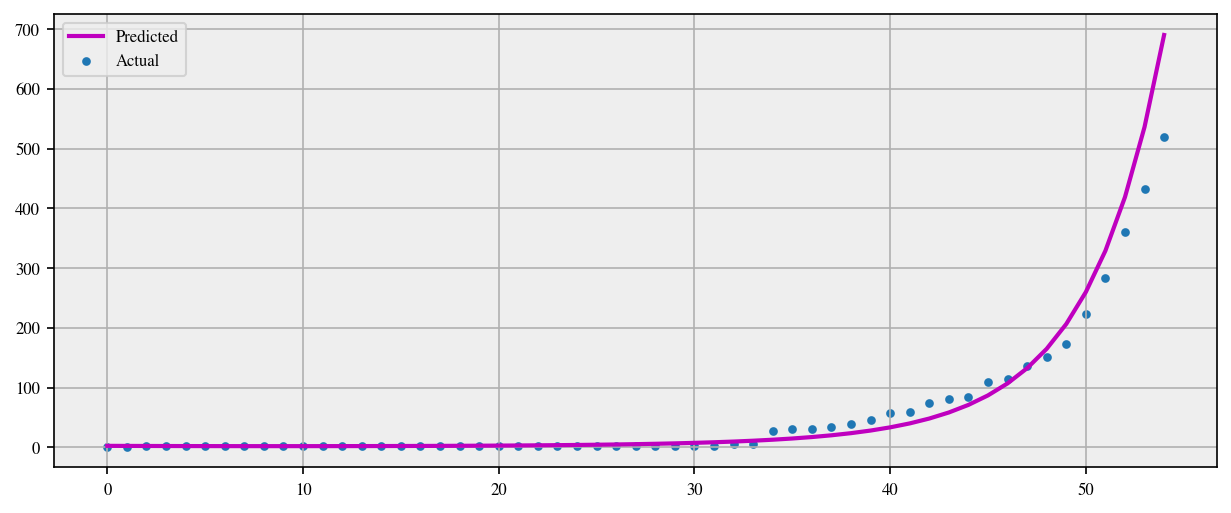

In [155]:
plt.scatter(x, before_lockdown['Confirmed'], s=10,label='Actual')
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_exp_pred), key=sort_axis)
x, y_poly_exp_pred = zip(*sorted_zip)
plt.plot(x, y_poly_exp_pred, color='m',label='Predicted')
plt.legend()
plt.show()

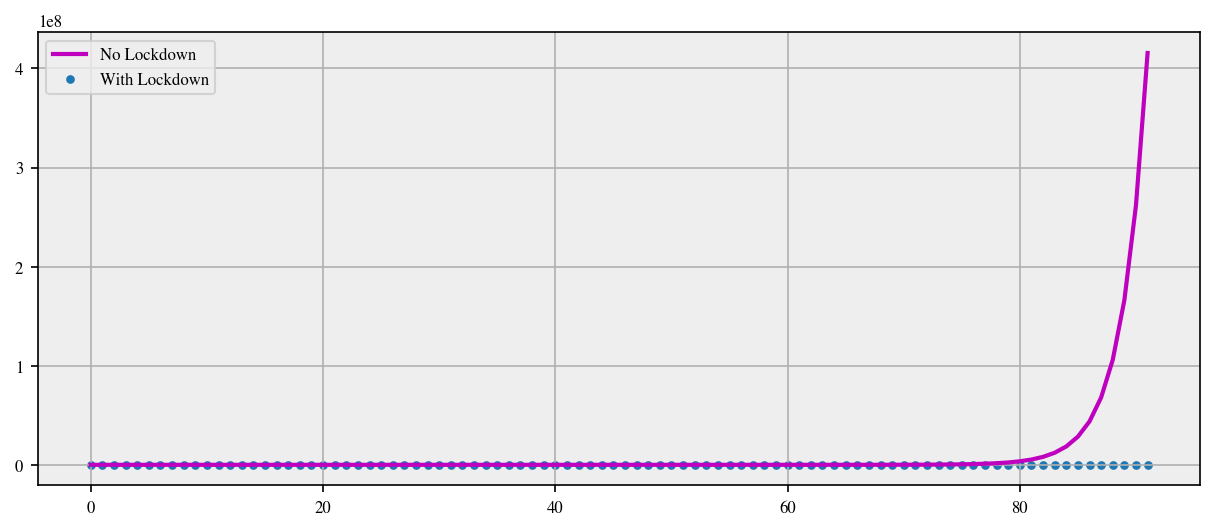

In [151]:
plt.scatter(x2, q9['Confirmed'], s=10,label='With Lockdown')
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x2,y2_poly_exp_pred), key=sort_axis)
x2, y2_poly_exp_pred = zip(*sorted_zip)
plt.plot(x2, y2_poly_exp_pred, color='m',label='No Lockdown')
plt.legend()
plt.show()

The RMSE=30.8852725706685 is much higher than what we get with simple polynomial regression
This is also why the predicted values till 30th April show such a high deviation from the actual curve